In [1]:
import re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## **Age Distribution Analysis**

In [2]:
c_age_df = pd.read_csv(r"..\data\cleaned\cleaned_age_distribution.csv")
c_age_df.head()

,age_distribution,male,female,total
0,0-4,8.7,8.2,8.5
1,9-5,9.1,8.8,8.9
2,14-10,9.8,9.4,9.6
3,15-19,10.4,9.9,10.1
4,20-24,10.2,10.7,10.4


**`CIC1A-12`**

- Age Distribution with Gender

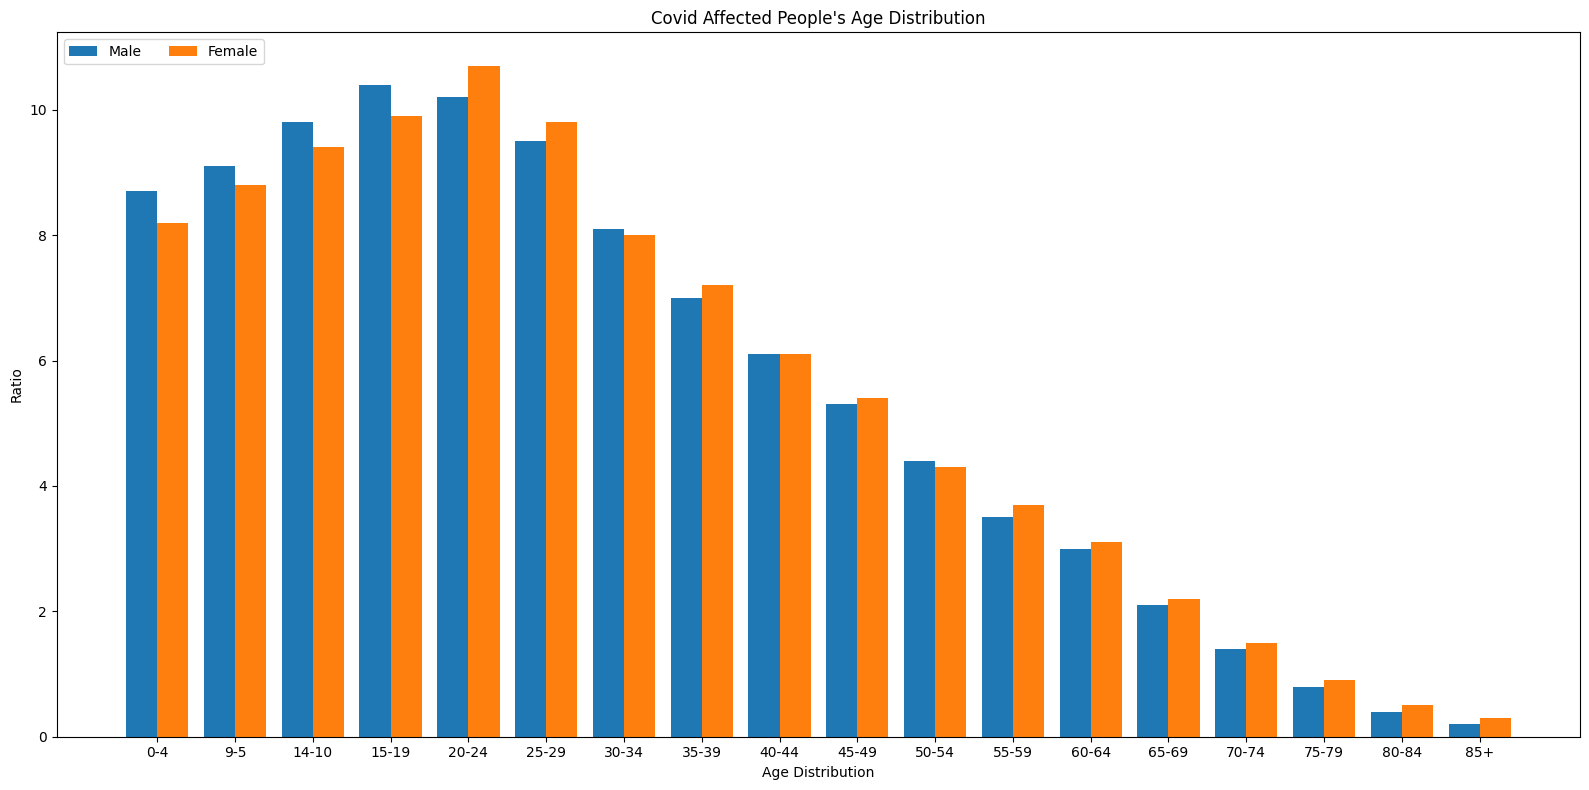

In [3]:
x = np.arange(len(c_age_df))
width = 0.40

fig, ax = plt.subplots(figsize=(16, 8))

male_bar = ax.bar(x - width, c_age_df["male"],width, label="Male")
female_bar = ax.bar(x, c_age_df["female"],width, label="Female")

ax.set_title("Covid Affected People's Age Distribution")
ax.set_xlabel("Age Distribution")
ax.set_ylabel("Ratio")
ax.set_xticks(x - (width/2))
ax.set_xticklabels(c_age_df["age_distribution"])

ax.legend(loc="upper left", ncols=2)

plt.tight_layout()
plt.show()

In [4]:
p_value = c_age_df[c_age_df["age_distribution"].isin(["14-10", "15-19", "20-24", "25-29"])][["male", "female"]].values

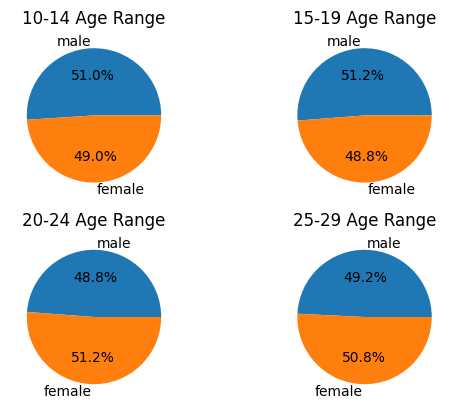

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=2)

ax[0][0].pie(p_value[0], labels=["male", "female"], autopct="%1.1f%%")
ax[0][0].set_title("10-14 Age Range")

ax[0][1].pie(p_value[1], labels=["male", "female"], autopct="%1.1f%%")
ax[0][1].set_title("15-19 Age Range")

ax[1][0].pie(p_value[2], labels=["male", "female"], autopct="%1.1f%%")
ax[1][0].set_title("20-24 Age Range")

ax[1][1].pie(p_value[3], labels=["male", "female"], autopct="%1.1f%%")
ax[1][1].set_title("25-29 Age Range")

plt.show()

- Child - Teen : Male are more vulnerable than female
- Adult : Female more vulnerable than Male

**`CIC1A-14`**

In [6]:
c_death_and_recovery = pd.read_csv(r"../data/cleaned/cleaned_death_and_recovery.csv")
c_death_and_recovery.head()

,age,gender,patient_status,city,state,comorbidity,state_code
0,70,M,Deceased,Mumbai,Maharashtra,diabetes,MH
1,85,M,Deceased,Mumbai,Maharashtra,diabetes,MH
2,54,F,Recovered,Bangalore,Karnataka,cardiovascular,KA
3,65,M,Recovered,Chennai,Chennai,cerebrovascular,TN
4,55,F,Recovered,Indore,Madhya Pradesh,diabetes,MP


In [7]:
def classify_age_range(age: int | str):
    if not isinstance(age, int):
        age = int(age)

    age_ranges = c_age_df["age_distribution"].values
    for age_range in age_ranges:
        grp = re.findall("\d+", age_range)
        if len(grp) == 2:
            result = [int(each) for each in grp if each.isalnum]
            if result[0] > result[1]:
                result[0], result[1] = result[1] , result[0]

            if result[0] <= age <= result[1]:
                return age_range
        else:
            if int(grp[0]) >= age:
                return age_range

In [8]:
c_death_and_recovery["age_range"] = c_death_and_recovery["age"].apply(classify_age_range)
c_death_and_recovery.head()

,age,gender,patient_status,city,state,comorbidity,state_code,age_range
0,70,M,Deceased,Mumbai,Maharashtra,diabetes,MH,70-74
1,85,M,Deceased,Mumbai,Maharashtra,diabetes,MH,85+
2,54,F,Recovered,Bangalore,Karnataka,cardiovascular,KA,50-54
3,65,M,Recovered,Chennai,Chennai,cerebrovascular,TN,65-69
4,55,F,Recovered,Indore,Madhya Pradesh,diabetes,MP,55-59


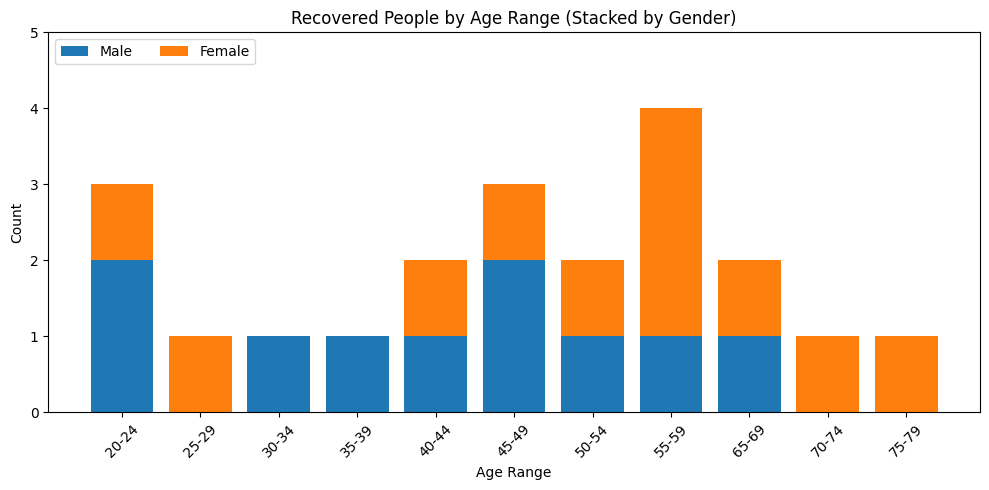

In [ ]:
recovered_df = c_death_and_recovery[c_death_and_recovery["patient_status"] == "Recovered"]

recovered_male_count = recovered_df[recovered_df["gender"] == "M"]["age_range"].value_counts()
recovered_female_count = recovered_df[recovered_df["gender"] == "F"]["age_range"].value_counts()

all_age_ranges = sorted(set(recovered_male_count.index).union(recovered_female_count.index))

male_values = [recovered_male_count.get(age, 0) for age in all_age_ranges]
female_values = [recovered_female_count.get(age, 0) for age in all_age_ranges]

x = np.arange(len(all_age_ranges))

plt.figure(figsize=(10, 5))
bar1 = plt.bar(x, male_values, label="Male")
bar2 = plt.bar(x, female_values, bottom=male_values, label="Female")  

plt.title("Recovered People by Age Range (Stacked by Gender)")
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.xticks(x, all_age_ranges, rotation=45)
plt.ylim(0, max(np.array(male_values) + np.array(female_values)) + 1)
plt.legend(loc="upper left", ncols=2)
plt.tight_layout()
plt.show()


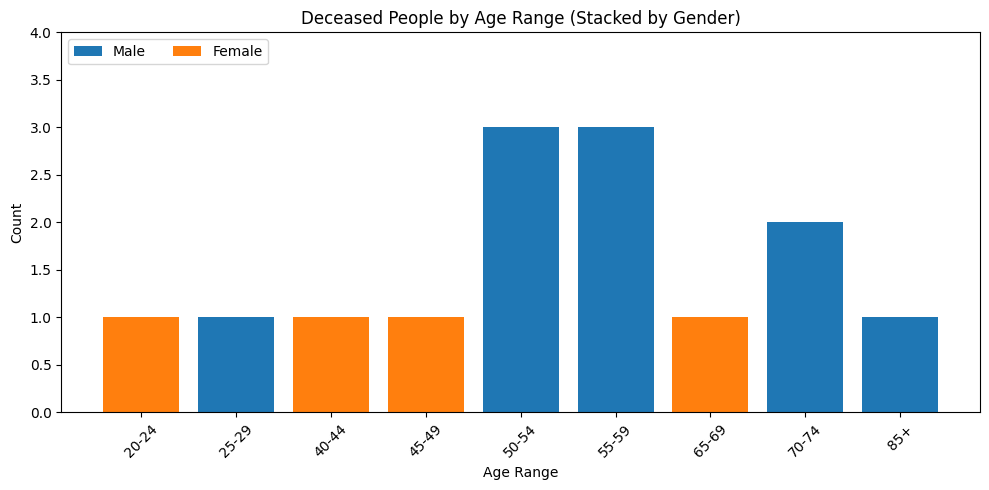

In [51]:
deceased_df = c_death_and_recovery[c_death_and_recovery["patient_status"] == "Deceased"]

deceased_male_count = deceased_df[deceased_df["gender"] == "M"]["age_range"].value_counts()
deceased_female_count = deceased_df[deceased_df["gender"] == "F"]["age_range"].value_counts()

all_age_ranges = sorted(set(deceased_male_count.index).union(deceased_female_count.index))

male_values = [deceased_male_count.get(age, 0) for age in all_age_ranges]
female_values = [deceased_female_count.get(age, 0) for age in all_age_ranges]

x = np.arange(len(all_age_ranges))

plt.figure(figsize=(10, 5))
bar1 = plt.bar(x, male_values, label="Male")
bar2 = plt.bar(x, female_values, bottom=male_values, label="Female")  

plt.title("Deceased People by Age Range (Stacked by Gender)")
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.xticks(x, all_age_ranges, rotation=45)
plt.ylim(0, max(np.array(male_values) + np.array(female_values)) + 1)
plt.legend(loc="upper left", ncols=2)
plt.tight_layout()
plt.show()


- As we can see, Senior People are mostly affected with Covid-19

In [10]:
def classify_age_group(age_range: str) -> str:
    match age_range:
        case "0-4":
            return "Preschooler"
        
        case "9-5" | "14-10":
           return "child" 
        
        case "15-19":
            return "Teen"
        
        case "20-24" | "25-29" | "30-34":
            return  "Young Adult"
        
        case "35-39" | "40-44" | "45-49" | "50-54":
            return "Middle-Aged Adult"
        
        case "55-59" | "60-64":
            return "Older Adult"

        case "65-69" | "70-74" | "75-79":
            return "Senior"
        
        case "80-84" | "85+":
            return "Very Old"

        case _:
            return "Not Classified"

In [11]:
c_age_df["age_group"] = c_age_df["age_distribution"].apply(classify_age_group)

In [12]:
c_age_df

,age_distribution,male,female,total,age_group
0,0-4,8.7,8.2,8.5,Preschooler
1,9-5,9.1,8.8,8.9,child
2,14-10,9.8,9.4,9.6,child
3,15-19,10.4,9.9,10.1,Teen
4,20-24,10.2,10.7,10.4,Young Adult
5,25-29,9.5,9.8,9.7,Young Adult
6,30-34,8.1,8.0,8.1,Young Adult
7,35-39,7.0,7.2,7.1,Middle-Aged Adult
8,40-44,6.1,6.1,6.1,Middle-Aged Adult
9,45-49,5.3,5.4,5.3,Middle-Aged Adult


In [13]:
g_group = c_age_df.groupby("age_group")

age_group_result = g_group[["male", "female"]].agg(["mean", "sum"])
age_group_result

male          female      
                        mean   sum      mean   sum
age_group                                         
Middle-Aged Adult   5.700000  22.8  5.750000  23.0
Older Adult         3.250000   6.5  3.400000   6.8
Preschooler         8.700000   8.7  8.200000   8.2
Senior              1.433333   4.3  1.533333   4.6
Teen               10.400000  10.4  9.900000   9.9
Very Old            0.300000   0.6  0.400000   0.8
Young Adult         9.266667  27.8  9.500000  28.5
child               9.450000  18.9  9.100000  18.2

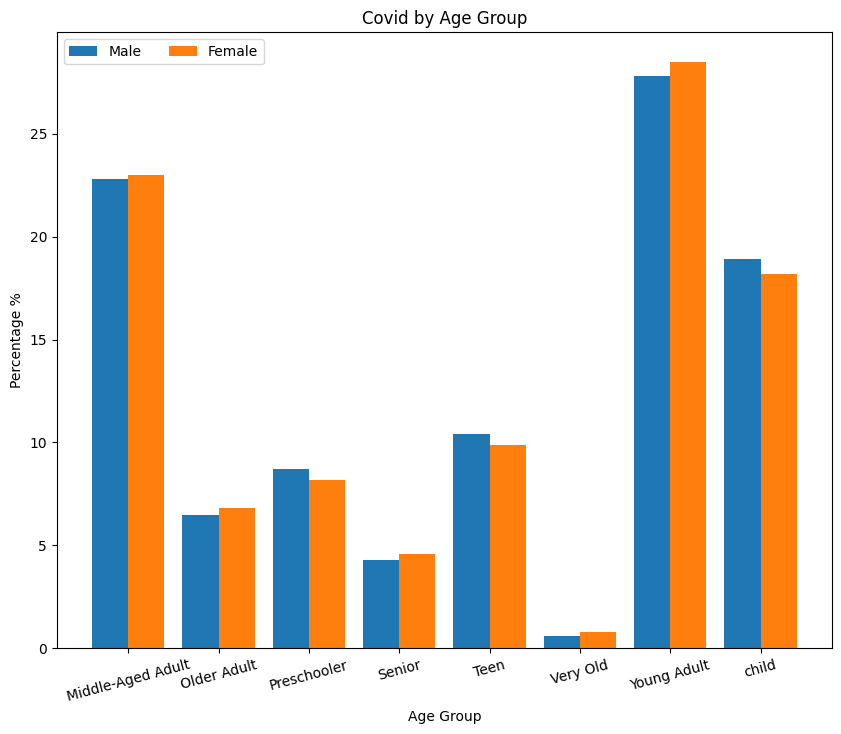

In [14]:
fig, ax = plt.subplots(figsize=(10,8))

x_len = np.arange(len(age_group_result))

ax.bar(x_len - width, age_group_result[("male", "sum")], width, label="Male")
ax.bar(x_len,age_group_result[("female", "sum")], width, label="Female")

ax.set_xticks(x_len - (width/2))
ax.set_xticklabels(age_group_result.index)
ax.legend(loc="upper left", ncols=2)
ax.set_title("Covid by Age Group")
ax.set_ylabel("Percentage %")
ax.set_xlabel("Age Group")

plt.xticks(rotation=15)
plt.show()

### As you can see,
- Young Adult are more vulnerable for Covid-19
- Top 3 vulnerable age group
    - Child (5-14)
    - Young Adult (20, 34)
    - Middle-Aged Adult (35, 54)